# Proejct 1: Edge Detection/Hough Transform

### What to Submit
Submit this iPython Notebook--containing all your code for the programming exercises below--on [learning suite](https://learningsuite.byu.edu/).

Your notebook file should produce the relevant plots and also provide a short write-up with answers to the questions in parts A-B.

Please also fill in here the time that each part took you:
* A1. Gradient Magnitude: <span style="color:red;">2 hours</span>
* A2. Gradient Orientation: <span style="color:red;">1 hour 30 min</span>
* A3. Laplacian Zero-crossings: <span style="color:red;">1 hour</span>
* A4. Gradient Magnitude + Zero-crossings: <span style="color:red;">1 hour</span>
* B. Hough Transform (Circles):  <span style="color:red;">7 hours</span>

Note that the images referred to and needed for this project are contained in the zip file provided (in the same directory as this notebook file).  <i>Please use the files as though they are in the same directory.  We will drop your notebook file into our folder and run it.</i>

### Programming Exercises
Make sure to read through all of the assignment and plan accordingly.  The first part is relatively easy, but you should allow adequate time for the second part.

The main goal is to investigate edge detection and the Hough transform as discussed in Sections 4.2 and 4.3 of [Szeliski](http://szeliski.org/Book "Computer Vision: Algorithms and Applications").

#### Part A: Edge Detection (32 points)
For each of the following four parts, try out your code first on the <span style="color:orange;">2D_White_Box.png</span> image, then on the more complicated <span style="color:orange;">blocks.png</span> image.

Note: Many of the images will contain negative numbers or numbers larger than 255.  Make sure you approprately scale the output images to display all of the information.  Hint: try mapping negative values to [0,128) and positive values to (128,255].

2D_White_Box.png:
![alt 2D_White_Box.png](2D_White_Box.png)

blocks.png:
![alt blocks.png](blocks.png)

<br><br><b>A1. Gradient Magnitude</b> - Compute the gradient magnitude image for a grayscale image.  Apply a suitable threshold to find edge points--play with the threshold to find the "best" solution.  How well does this seem to work?  Feel free to use any preprocessing you wish to prior to edge detection.

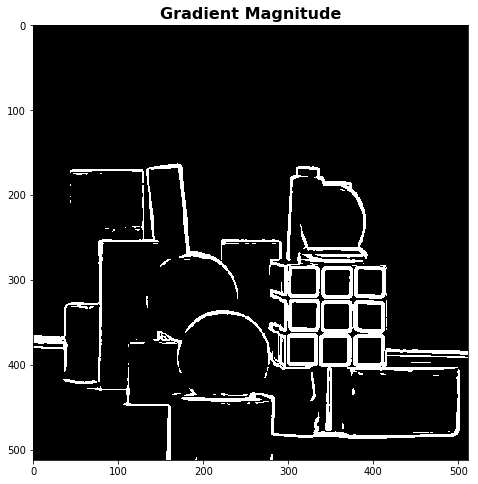

In [2]:
# Part 1. Compute the Gradient Magnitude
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import cv2

plt.rcParams['figure.figsize'] = [15,8]
plt.rcParams['axes.titlesize'] = '16'
plt.rcParams['axes.titleweight'] = 'bold'

def gradient_magnitude(image, threshold):
    sobelKernelX = np.array([[-1,0,1], [-2,0,2], [-1,0,1]])
    sobelKernelY = np.array([[-1,-2,-1], [0,0,0], [1,2,1]])
    
    image = cv2.GaussianBlur(image, (5,5), 0)
    
    outputX = cv2.filter2D(image, cv2.CV_64F, sobelKernelX)
    outputY = cv2.filter2D(image, cv2.CV_64F, sobelKernelY)
    
    answer = np.sqrt(outputX**2 + outputY**2, dtype='float')
        
    answer[answer > threshold] = 255
    answer[answer <= threshold] = 0
        
    return answer

# Show your results on the blocks image
image = cv2.imread('blocks.png', -1)
gradientMagnitude = gradient_magnitude(image, 75)
plt.imshow(gradientMagnitude, cmap="gray",vmin=0,vmax=255)
plt.title('Gradient Magnitude')

plt.show()



###IF THIS CELL DOESN'T SHOW THE FIRST TIME, RUN IT AGAIN PLEASE, IT SHOWS UP THE SECOND TIME

<br><b>A2. Gradient Orientation</b> - Compute a gradient orientation image for a grayscale image.  Encode the orientations as intensity using any method you wish. (Just make sure to document it.)  Hint: use atan2(), not atan(), to do the angle calculation.

<class 'numpy.ndarray'>
uint8


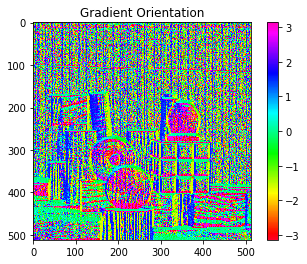

In [3]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import cv2
from matplotlib.pyplot import colorbar

# Part 2. Compute the Gradient Orientation
def gradient_orientation(image):    
    sobelKernelX = np.array([[-1,0,1], [-2,0,2], [-1,0,1]]) 
    sobelKernelY = np.array([[-1,-2,-1], [0,0,0], [1,2,1]])
    print(type(image))
    print(image.dtype)
    dx = cv2.filter2D(image, cv2.CV_64F, sobelKernelX)
    dy = cv2.filter2D(image, cv2.CV_64F, sobelKernelY)
    
    arcTan = np.arctan2(dx, dy)
    
    return arcTan

# Show your results on the blocks image
image = cv2.imread('blocks.png', -1)
gradientOrientation = gradient_orientation(image)

img_plot = plt.imshow(gradientOrientation, cmap='gist_rainbow')
plt.colorbar()
plt.title('Gradient Orientation')

plt.show()


<br><b>A3. Laplacian Zero-Crossings</b> - Apply a 3x3 Laplacian kernel to blocks and find the zero crossings.



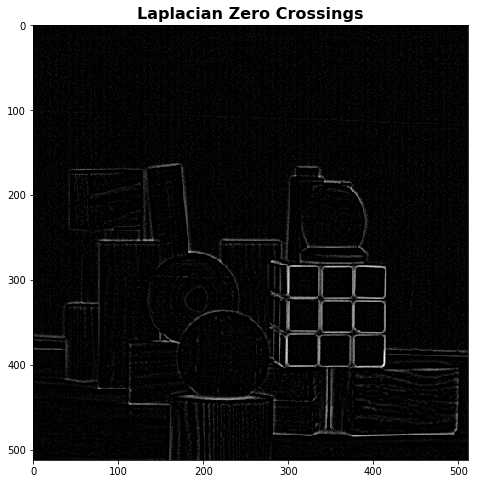

In [4]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import cv2

# Part 3. Find the Zero Crossings
def laplacian_zero_crossings(image):
    laplacian_kernel = np.array([[0,1,0], [1,-4,1], [0,1,0]])
    
    gaussian = cv2.GaussianBlur(image, (5,5), 0)
    
    answer = cv2.filter2D(gaussian, cv2.CV_64F, laplacian_kernel)
    
    answer = np.where(answer > 0, answer*255, 0)
    
    return answer


# Show the results on blocks image
image = cv2.imread('blocks.png', -1)
lapZeroCrossings = laplacian_zero_crossings(image)
plt.imshow(lapZeroCrossings, cmap="gray")
plt.title('Laplacian Zero Crossings')

plt.show()

<br><b>A4. Combine Gradient Magnitude and Zero-Crossings</b> - Use the gradient magnitude image computed in item 1 to select Laplacian zero-crossings in part 3 that correspond to points with gradients higher than some threshold that you determine.  Adjust your threshold to find the best solution.


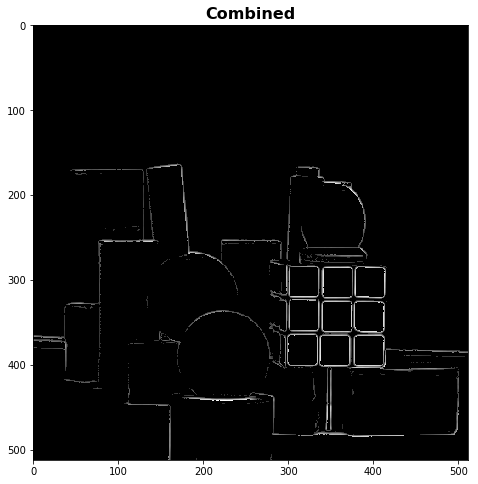

In [5]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import cv2

# Part 4. Final Solution
def combine(image):
    #Apply a gaussian blur to the image
    gaussian = cv2.GaussianBlur(image, (5,5), 0)

    #Gradient Magnitude
    threshold = 75
    sobelKernelX = np.array([[-1,0,1], [-2,0,2], [-1,0,1]])
    sobelKernelY = np.array([[-1,-2,-1], [0,0,0], [1,2,1]])
        
    dx = cv2.filter2D(gaussian, cv2.CV_64F, sobelKernelX)
    dy = cv2.filter2D(gaussian, cv2.CV_64F, sobelKernelY)
    
    gradMag = np.sqrt(dx**2 + dy**2, dtype='float')

    #Laplacian zero crossings
    laplacian_kernel = np.array([[0,1,0], [1,-4,1], [0,1,0]])
    lapLace = cv2.filter2D(gaussian, cv2.CV_64F, laplacian_kernel)
    
    #choose the gradMag pixel that is above threshold and laplace is > 0
    output = np.where(np.logical_and(gradMag > threshold, lapLace > 0), gradMag, 0)
    
    return output

# Show the results on blocks image
image = cv2.imread('blocks.png', -1)
combinedImage = combine(image)
plt.imshow(combinedImage, cmap="gray")
plt.title('Combined')

plt.show()


##### Part A: Write-up

<span style="color:red">Please describe your results here and any questions, etc. above.</span>
<br>
<ul>
    <li>A1 - I used 75 as my threshold after applying a gaussian blur to reduce noise, I played around with 90 and 100 before applying the gaussian blur as well. Without the blur, 75 was bringing out grains in the wood and 100 was leaving some edges out of the upper left blocks.</li>
    <li>A2 - I encoded the orientations using "gist rainbow" with cmap='gist_rainbow'. I used it because it brings out all the orientations more than say "viridis" which makes all the orientations look murky green.</li>
    <li>A3 - I applied the laplacian kernel and then saw which pixels were greater than zero which I then amplified making essentailly 255 and everything else 0. </li>
    <li>A4 - I first applied a gaussian blur to the input image. After that I took the gradient magnitude of the image and stored that as one image. Next I took the laplacian kernel and applied it to the gaussian blurred image storing that as well. Next I went through the gradient magnitude image and chose pixels from that image that were greater than a threshold of 75 and whose corresponding pixels in the laplacian image had a value greater than 0. </li>


<br><br><br>
#### Part B: Hough Transform (68 points)
Use the Hough transform to find all of the circular shapes in a color image.  They occur in three (approximate) sizes: 32, 64, and 96 pixels in diameter.  Try it out first on the simple <span style="color:orange;">simplecircle.png</span> image, then on the more complicated <span style="color:orange;">circles.png</span> image.

After finding maxima in the accumulator(s), write out a list of positions and sizes (small, medium, or large) for each circle.  Be aware that for some of the circles the center is outside the image--you should still be able to identify where it is.

Some of the cases are tricky--don't panic if you don't get them all at first. Keep trying to get as many as possible while generatign as few possible false positives (erroneous identifications).

About 40 of the 68 points will be on how many of the circles you can detect (1-2 false positives are okay). To know what you should be shooting for, there are:
* 5 small circles (blue/cyan, light gray, purple clipped on the left, two eyes of the pumpkin).
* 12 medium circles (green one in the top left corner, orange/magenta/pink near top/left, yello, magenta, purple/cyan, medium grey in "target", med blue clipped on the left, red/white/blue on lower right).
* 3 Large circles (black in target, black/dark blue on right, and orange pumpkin).

For the <span style="color:orange;">circles.png</span> file, and each of the 3 diameters, show (1) the accumulation array and (2) the <span style="color:orange;">circles.png</span> with the detected circles outlined.  This would be a total of 6 figures (3 diameters with two plots each).

This will be graded based on how well your method performs and how innovative your solution is. **In the write-up, describe any improvements/optimizations you made from the vanilla Hough transform**.

simplecircle.png:
![alt simplecircle.png](simplecircle.png)
circles.png:
![alt circles.png](circles.png)

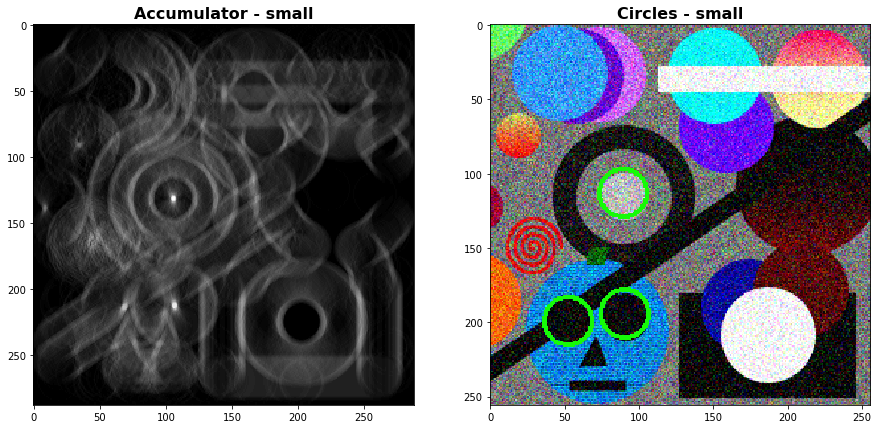

In [6]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import cv2
import math

#radii
SMALL = 16
MEDIUM = 32
LARGE = 48


def get_y_coordinate(xcenter, ycenter, x, radius):
    y = round(math.sqrt((radius**2) - (x - xcenter)**2) + ycenter)
    return y

def draw_circle(accumulator, xcenter, ycenter, radius):
    #loop through x-radius to x+radius, getting y coordinate and drawing 2 points (up and down),
    #except for the leftmost and rightmost x values, we only draw one for each
    
    for x in range(xcenter - radius, xcenter + radius + 1):
        #if leftmost or rightmost x point, only draw one point
        if x == (xcenter - radius) or x == (xcenter + radius):
            accumulator[x, ycenter] += 1
        
        #get the y coordinate, draw a point at (x, y) and (x, ycenter - y)
        else:
            y = get_y_coordinate(xcenter, ycenter, x, radius)
            yNeg = ycenter - (y - ycenter)
            accumulator[x,y] += 1
            accumulator[x,yNeg] += 1
    

# Part B - Hough Transform - code below
def hough_transform(image, radius):
    #Grayscale the image
    gray = np.dot(image, (0.299, 0.587, 0.114))
    
    #find edges (also applies gaussian blur)
    edges = gradient_magnitude(gray, 70)
    
    #the accumulator which will keep track of "votes"
    accumulator = np.zeros((image.shape[0] + (2*radius), image.shape[1] + (2*radius)), dtype=int)
    
    #copy edges into a matrix the same size as accumulator
    edgesBorder = np.zeros((image.shape[0] + (2*radius), image.shape[1] + (2*radius)), dtype=int)
    for col in range(edges.shape[0]):
        for row in range(edges.shape[1]):
            if edges[col,row] == 255:
                edgesBorder[col+radius, row+radius] = 255
        
    #go through edgesBorder and wherever there's an edge, draw a circle around it in the accumulator
    for col in range(edgesBorder.shape[0]):
        for row in range(edgesBorder.shape[1]):
            if edgesBorder[col,row] == 255:
                draw_circle(accumulator, col, row, radius)
    
    #find maxes in accumulator and plot circles
    threshold = 0
    minDistance = 0
    if radius == SMALL:
        threshold = 44
        minDistance = 5
        
    elif radius == MEDIUM:
        threshold = 74
        minDistance = 5
        
    else:
        threshold = 90
        minDistance = 10
        
    indices = np.where(accumulator > threshold)
    xs = indices[0]
    ys = indices[1]
    chosenXs = []
    avg = cv2.blur(accumulator, (5,5))
    for i in range(len(xs)):
        
        #check if a similar point hasn't already been plotted
        hasBeenPlotted = False
        for chosen in chosenXs:
            if abs(xs[i] - chosen) < minDistance:
                hasBeenPlotted = True
                break
        
        if not hasBeenPlotted:
            if abs(avg[xs[i], ys[i]] - accumulator[xs[i], ys[i]]) < 20:
                #plot it and add it to chosenXs
                cv2.circle(image, (ys[i] - radius, xs[i] - radius), radius, (22,250,8), 2)
                chosenXs.append(xs[i])

    return accumulator, image

# Be sure to show all of the figures required in the description above


### RUN THIS TO SEE SMALL ###
image = cv2.imread('circles.png', -1)
accumulator, circles = hough_transform(image, SMALL)

plt.subplot(1,2,1)
plt.imshow(accumulator, cmap='gray')
plt.title('Accumulator - small')

plt.subplot(1,2,2)
plt.imshow(circles)
plt.title('Circles - small')

plt.show()

##### RUN TO SEE MEDIUM

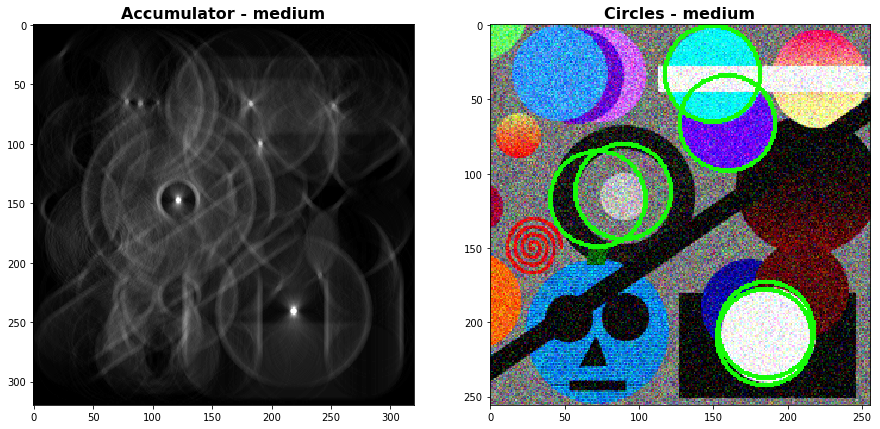

In [32]:
### RUN THIS TO SEE MEDIUM ###

image = cv2.imread('circles.png', -1)
accumulator, circles = hough_transform(image, MEDIUM)

plt.subplot(1,2,1)
plt.imshow(accumulator, cmap='gray')
plt.title('Accumulator - medium')

plt.subplot(1,2,2)
plt.imshow(circles)
plt.title('Circles - medium')

plt.show()

##### RUN TO SEE LARGE

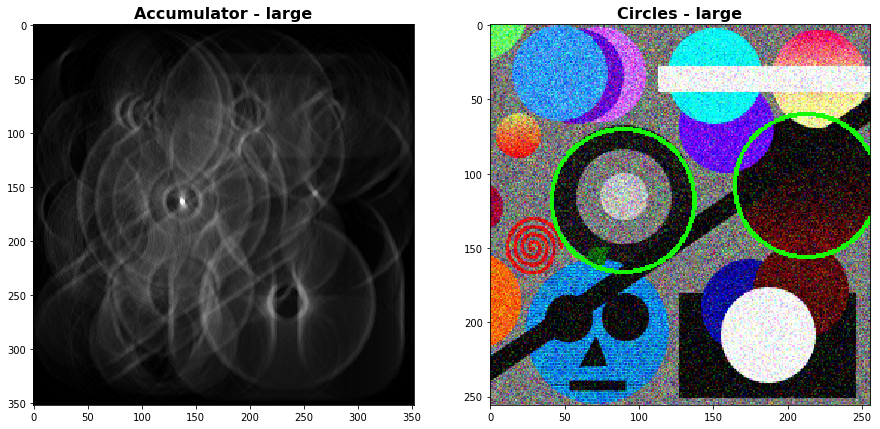

In [8]:
### RUN TO SEE LARGE ###

image = cv2.imread('circles.png', -1)
accumulator, circles = hough_transform(image, LARGE)

plt.subplot(1,2,1)
plt.imshow(accumulator, cmap='gray')
plt.title('Accumulator - large')

plt.subplot(1,2,2)
plt.imshow(circles)
plt.title('Circles - large')

plt.show()

##### Part B: Write-up

<span style="color:red">Please describe your results here and any questions, etc. above.</span>
<br>
<span>This was tough, the most trouble I had was with getting the centers of the medium circles to stand out more than random crossings of "circles" in the middle of the noise. I gaussian blurred the image before anything hoping that would reduce the noise. Another issue was with the contrast of the pumpkin after applying a grayscale.</span>
<br><br>
<span>Some optimizations I made were making sure that multiple similar points weren't plotted. I used the parametric equation of a circle to find the points I should plot for the accumulator matrix.</span>
